   SOURCEID   
--------------
45195940855819
45195940855827
45195940855830
45195940855833
45195940855837
45195940855839
45195940855840
45195940855841
45195940855842
45195940855843
           ...
45195940913112
45195940913125
45195940913131
45195940913133
45195940913141
45195940913146
45195940913158
45195940913167
45195940913172
45195940913173
45195940913180
Length = 37947 rows


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


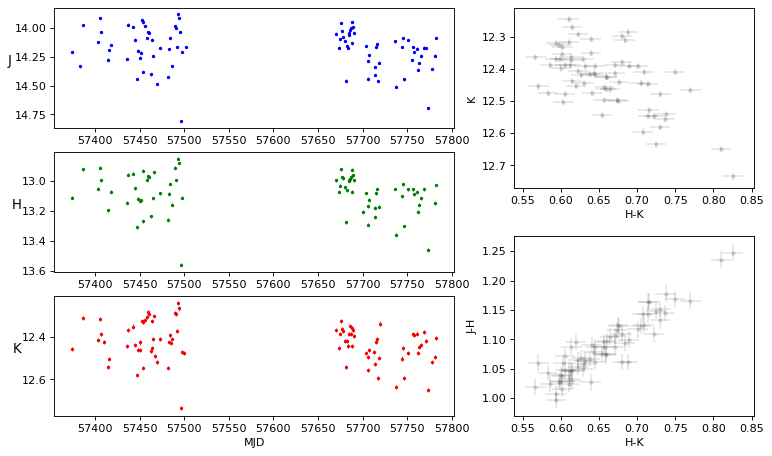

In [18]:
import astropy.table
import pandas as pd
from wuvars.analysis.variability_selection import data_nuller, sq2, sq2_variables

dat = astropy.table.Table.read("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv11/WSERV11_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected.fits")
df = dat.to_pandas()
data_nuller(df)
dat_again = astropy.table.Table.from_pandas(df)

wserv=11
spreadsheet_path = os.path.join("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts",
                                f"wserv{str(wserv)}",
                                f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",)

ds = pd.read_hdf(spreadsheet_path, key='table')

q2 = sq2(ds, 50, 150)
v2 = sq2_variables(ds, 50, 150)

ds[v2].index

dat_by_source = dat_again.group_by("SOURCEID")
print(dat_by_source.groups.keys)

sourceid = 45195940855911

dat_source = dat_by_source.groups[dat_by_source.groups.keys['SOURCEID'] == sourceid]

ds[v2].index

%run ../lightcurve.py
sourceid = 45195940911195
fig = simple_lc(dat_by_source, sourceid)

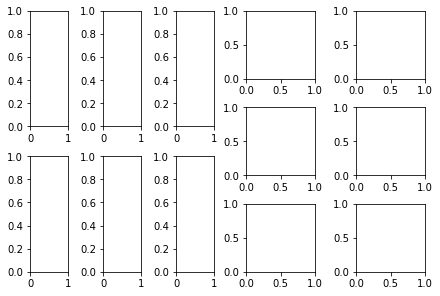

In [2]:
fig10 = plt.figure(constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 3)
gs01 = gs0[1].subgridspec(3, 2)

for a in range(2):
    for b in range(3):
        fig10.add_subplot(gs00[a, b])
        fig10.add_subplot(gs01[b, a])

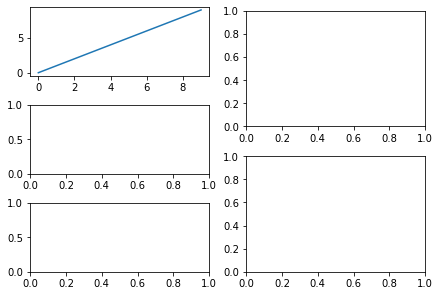

In [3]:
fig10 = plt.figure(constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(3, 1)
gs01 = gs0[1].subgridspec(2, 1)


left_axes = []
for a in range(3):
    left_axes.append(fig10.add_subplot(gs00[a, 0]))
    
right_axes = []
for b in range(2):
    right_axes.append(fig10.add_subplot(gs01[b, 0]))
    
left_axes[0].plot(np.arange(10))

[(array([206., 211., 210., 159., 114.,  86.,  10.,   3.,   0.,   1.]),
  array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
  <BarContainer object of 10 artists>),
 (array([206., 211., 210., 159., 114.,  86.,  10.,   3.,   0.,   1.]),
  array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
  <BarContainer object of 10 artists>)]

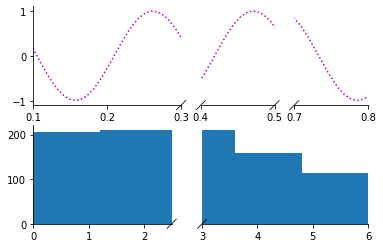

In [1]:
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import numpy as np

sps1, sps2 = GridSpec(2,1)

bax = brokenaxes(xlims=((.1, .3), (.4, .5), (.7, .8)), subplot_spec=sps1)
x = np.linspace(0, 1, 100)
bax.plot(x, np.sin(x*30), ls=':', color='m')

x = np.random.poisson(3, 1000)
bax = brokenaxes(xlims=((0, 2.5), (3, 6)), subplot_spec=sps2)
bax.hist(x, histtype='bar')

[(array([ 39., 152., 208., 242., 173.,  93.,  59.,  22.,   9.,   3.]),
  array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
  <BarContainer object of 10 artists>),
 (array([ 39., 152., 208., 242., 173.,  93.,  59.,  22.,   9.,   3.]),
  array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
  <BarContainer object of 10 artists>)]

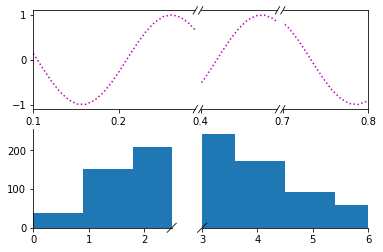

In [16]:
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import numpy as np

sps1, sps2 = GridSpec(2,1)

bax = brokenaxes(xlims=((.1, .29), (.4, .49), (.7, .8)), subplot_spec=sps1, wspace=0.05, d=0.01, tilt=60, despine=False)
x = np.linspace(0, 1, 100)
bax.plot(x, np.sin(x*30), ls=':', color='m')

x = np.random.poisson(3, 1000)
bax = brokenaxes(xlims=((0, 2.5), (3, 6)), subplot_spec=sps2)
bax.hist(x, histtype='bar')

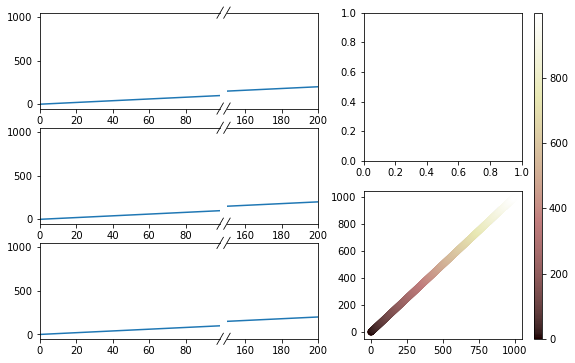

In [46]:
fig10 = plt.figure(constrained_layout=False, figsize=(9,6))
gs0 = fig10.add_gridspec(1, 2, width_ratios=[5, 3.2], wspace=0.2)

gs00 = gs0[0].subgridspec(3, 1)
gs_right = gs0[1].subgridspec(1, 2, width_ratios=(2, 0.1), wspace=0.15)
gs01 = gs_right[0].subgridspec(2, 1)

bax_kwargs = dict(despine=False, d=0.01, tilt=60, wspace=0.05)

bax0 = brokenaxes(xlims=((0,99), (150,200)), subplot_spec=gs00[0,0], **bax_kwargs)
bax1 = brokenaxes(xlims=((0,99), (150,200)), subplot_spec=gs00[1,0], **bax_kwargs)
bax2 = brokenaxes(xlims=((0,99), (150,200)), subplot_spec=gs00[2,0], **bax_kwargs)

x_array = np.arange(1000)
bax0.plot(x_array)
bax1.plot(x_array)
bax2.plot(x_array)

bax3 = fig10.add_subplot(gs01[0,0])
bax4 = fig10.add_subplot(gs01[1,0]) 

bax5 = fig10.add_subplot(gs_right[1])

sc = bax4.scatter(x_array, x_array, marker='o', c=x_array, cmap='pink')
fig10.colorbar(sc, cax=bax5)

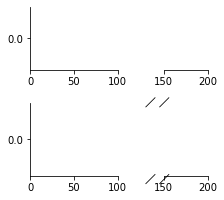

In [25]:
fig10 = plt.figure(constrained_layout=True)
gs0 = fig10.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(3, 1)
gs01 = gs0[1].subgridspec(2, 1)

bax0 = brokenaxes(xlims=((0,100), (150,200)), subplot_spec=gs00[0,0])
bax1 = brokenaxes(xlims=((0,100), (150,200)), subplot_spec=gs00[1,0])

In [30]:
gs0 = fig10.add_gridspec?

In [ ]:
gs0 = fig10.add_gridspec

In [6]:
np.__version__

'1.19.2'

In [8]:
plt.scatter?